<a href="https://colab.research.google.com/github/ndellapesca/Bankruptcy-Prediction/blob/main/Connected_Component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install giotto-tda

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
import gtda.mapper as mp
import random
from sklearn.cluster import KMeans
import networkx as nx
import igraph as ig

[0.61109118217477, 6.265040540829707, 1180.8286092552478]
[22.522914326078602, 22.522914326078602, 22.522914326078602]
[[2.25229143e+01 6.11091182e-01]
 [2.25229143e+01 6.26504054e+00]
 [2.25229143e+01 1.18082861e+03]]
(3, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Number of connected components: 0


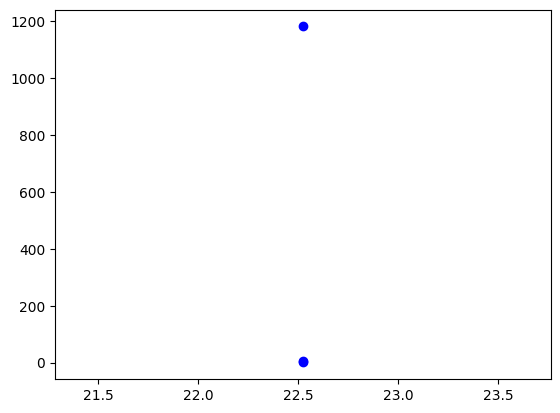

In [ ]:
#Original Code
x = np.random.uniform(0,100)
y1 = np.random.uniform(0,10)
y2 = np.random.uniform(0,10)
y3 = np.random.uniform(1000,1450)

data_y = [y1, y2, y3]
data_x = [x, x, x]
print(data_y)
print(data_x)
plt.scatter(data_x, data_y, color='blue', marker='o')
data = np.vstack((data_x, data_y)).T
print(data)
print(data.shape)
filter_func = mp.Projection(columns=[1]) # Define filter function
cover = mp.CubicalCover(n_intervals=3, overlap_frac=0.05) # Define cover
clusterer = KMeans(n_clusters=1) # Define clusterer


# Initialise pipeline
pipe = mp.make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer
)

fig = mp.plot_static_mapper_graph(pipe, data, color_data=data[:,1])
fig.show(config={'scrollZoom': False})


In [ ]:
#Lone Tester, doesn't go through every interval
num_iterations = 25
connected_components_counts = []
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0

for _ in range(num_iterations):
    x = np.random.uniform(0, 100)
    y1 = np.random.uniform(0, 10)
    y2 = np.random.uniform(0, 10)
    y3 = np.random.uniform(1000, 1450)
    y4 = np.random.uniform(0, 1000)
    y5 = np.random.uniform(0, 1000)
    y6 = np.random.uniform(0, 1000)

    data_y = [y1, y2, y3, y4, y5, y6]
    data_x = [x, x, x, x, x, x]
    data = np.vstack((data_x, data_y)).T


    filter_func = mp.Projection(columns=[1])  # Define filter function
    cover = mp.CubicalCover(n_intervals=3, overlap_frac=0.5)  # Define cover
    clusterer = KMeans(n_clusters=1)  # Define clusterer

    # Initialise pipeline
    pipe = mp.make_mapper_pipeline(
        filter_func=filter_func,
        cover=cover,
        clusterer=clusterer
    )


    graph = pipe.fit_transform(data)
    igraph_graph = graph
    if num_connected_components == 0:
      count_0 = count_0 + 1
    elif num_connected_components == 1:
      count_1 = count_1 + 1
    elif num_connected_components == 2:
      count_2 = count_2 + 1
    elif num_connected_components == 3:
      count_3 = count_3 + 1


    num_connected_components = len(igraph_graph.clusters())
    connected_components_counts.append(num_connected_components)

average_connected_components = np.mean(connected_components_counts)
print(f"Average number of connected components over {num_iterations} runs: {average_connected_components}")





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-88-d1515608d701>:46: DeprecationWarning:

Graph.clusters() is deprecated; use Graph.connected_components() instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the wa

Average number of connected components over 25 runs: 1.68


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-88-d1515608d701>:46: DeprecationWarning:

Graph.clusters() is deprecated; use Graph.connected_components() instead

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the wa

In [4]:
#Diagnostics for Indvidual Graphs
fig = mp.plot_static_mapper_graph(pipe, data, color_data=data[:,1])
fig.show(config={'scrollZoom': False})
print(f"Average number of connected components over {num_iterations} runs: {average_connected_components}")
print(f"Number of Mapper Graphs with 0 connected components: {count_0}")
print(f"Number of Mapper Graphs with 1 connected components: {count_1}")
print(f"Number of Mapper Graphs with 2 connected components: {count_2}")
print(f"Number of Mapper Graphs with 3 connected components: {count_3}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Average number of connected components over 100 runs: [(0.01, 3.65), (0.060000000000000005, 3.46), (0.11, 3.43), (0.16000000000000003, 3.31), (0.21000000000000002, 3.26), (0.26, 3.24), (0.31000000000000005, 3.08), (0.36000000000000004, 2.95), (0.41000000000000003, 2.88), (0.46, 2.83), (0.51, 2.61), (0.56, 2.43), (0.6100000000000001, 2.23), (0.66, 2.17), (0.7100000000000001, 1.98), (0.76, 1.8), (0.81, 1.62), (0.8600000000000001, 1.4), (0.91, 1.21)]


NameError: name 'count_0' is not defined

Streaming output truncated to the last 5000 lines.
<ipython-input-3-3f9a852fd180>:39: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  num_connected_components = len(igraph_graph.clusters())
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

Average number of connected components for overlap fraction 0.01: 3.65
Average number of connected components for overlap fraction 0.06: 3.46
Average number of connected components for overlap fraction 0.11: 3.43
Average number of connected components for overlap fraction 0.16: 3.31
Average number of connected components for overlap fraction 0.21: 3.26
Average number of connected components for overlap fraction 0.26: 3.24
Average number of connected components for overlap fraction 0.31: 3.08
Average number of connected components for overlap fraction 0.36: 2.95
Average number of connected components for overlap fraction 0.41: 2.88
Average number of connected components for overlap fraction 0.46: 2.83
Average number of connected components for overlap fraction 0.51: 2.61
Average number of connected components for overlap fraction 0.56: 2.43
Average number of connected components for overlap fraction 0.61: 2.23
Average number of connected components for overlap fraction 0.66: 2.17
Averag

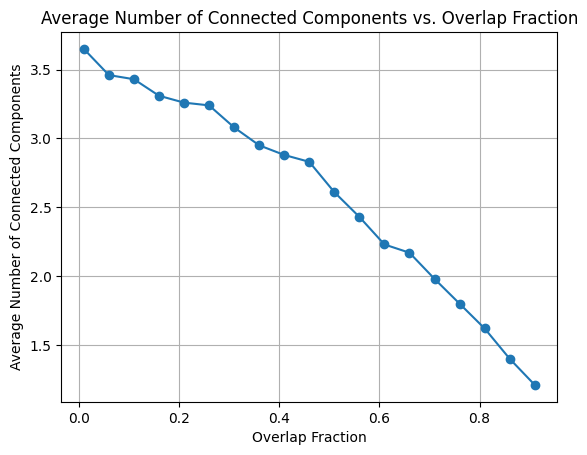

In [3]:
#Overlap Fraction vs. Interval Code/Graph
num_iterations = 100
overlap_fractions = np.arange(0.01, 0.96, 0.05)
average_connected_components = []


for overlap_frac in overlap_fractions:
    connected_components_counts = []
    for _ in range(num_iterations):
        x = np.random.uniform(0, 100)
        y1 = np.random.uniform(0, 10)
        y2 = np.random.uniform(0, 10)
        y3 = np.random.uniform(1000, 1450)
        y4 = np.random.uniform(0, 1450)
        y5 = np.random.uniform(0, 1450)
        y6 = np.random.uniform(0, 1450)

        data_y = [y1, y2, y3, y4, y5, y6]
        data_x = [x, x, x, x, x, x]
        data = np.vstack((data_x, data_y)).T


        filter_func = mp.Projection(columns=[1])  # Define filter function
        cover = mp.CubicalCover(n_intervals=6, overlap_frac=overlap_frac)  # Define cover with current overlap
        clusterer = KMeans(n_clusters=1)  # Define clusterer

        # Initialise pipeline
        pipe = mp.make_mapper_pipeline(
            filter_func=filter_func,
            cover=cover,
            clusterer=clusterer
        )


        graph = pipe.fit_transform(data)
        igraph_graph = graph


        num_connected_components = len(igraph_graph.clusters())
        connected_components_counts.append(num_connected_components)


    average = np.mean(connected_components_counts)
    average_connected_components.append((overlap_frac, average))


for overlap_frac, average in average_connected_components:
    print(f"Average number of connected components for overlap fraction {overlap_frac:.2f}: {average}")


overlap_values, averages = zip(*average_connected_components)
plt.plot(overlap_values, averages, marker='o')
plt.title('Average Number of Connected Components vs. Overlap Fraction')
plt.xlabel('Overlap Fraction')
plt.ylabel('Average Number of Connected Components')
plt.grid()
plt.show()


In [ ]:
#Distance Matrix Calculations
#from scipy.spatial import distance_matrix
num_iterations = 25
connected_components_counts = []
dm0 = []
dm1 = []
dm2 = []
dm3 = []
dm4 = []
dm5 = []
dm6 = []
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0

for _ in range(num_iterations):
    x = np.random.uniform(0, 100)
    y1 = np.random.uniform(0, 10)
    y2 = np.random.uniform(0, 10)
    y3 = np.random.uniform(1000, 1450)
    y4 = np.random.uniform(0, 1000)
    y5 = np.random.uniform(0, 1000)
    y6 = np.random.uniform(0, 1000)

    data_y = [y1, y2, y3, y4, y5, y6]
    data_x = [x, x, x, x, x, x]
    data = np.vstack((data_x, data_y)).T

    dist_matrix = distance_matrix(data, data)
    distance_matrices.append(dist_matrix)

    filter_func = mp.Projection(columns=[1])  # Define filter function
    cover = mp.CubicalCover(n_intervals=3, overlap_frac=0.5)  # Define cover
    clusterer = KMeans(n_clusters=1)  # Define clusterer

    # Initialise pipeline
    pipe = mp.make_mapper_pipeline(
        filter_func=filter_func,
        cover=cover,
        clusterer=clusterer
    )


    graph = pipe.fit_transform(data)
    igraph_graph = graph
    if num_connected_components == 0:
      count_0 = count_0 + 1
      dm0 = distance_matrix(data,data)
    elif num_connected_components == 1:
      count_1 = count_1 + 1
    elif num_connected_components == 2:
      count_2 = count_2 + 1
    elif num_connected_components == 3:
      count_3 = count_3 + 1


    num_connected_components = len(igraph_graph.clusters())
    connected_components_counts.append(num_connected_components)

average_connected_components = np.mean(connected_components_counts)
print(f"Average number of connected components over {num_iterations} runs: {average_connected_components}")


In [ ]:
print("Distance matrices for each iteration:")
for i, dist_matrix in enumerate(distance_matrices):
    print(f"Distance Matrix for Iteration {i + 1}:\n{dist_matrix}\n")
    total_distance = np.sum(dist_matrix)
    print(total_distance)

average_connected_components = np.mean(connected_components_counts)
print(f"Average number of connected components over {num_iterations} runs: {average_connected_components}")

fig = mp.plot_static_mapper_graph(pipe, data, color_data=data[:, 1])
fig.show(config={'scrollZoom': False})

Distance matrices for each iteration:
Distance Matrix for Iteration 1:
[[   0.            2.16458068 1144.09138058  477.67886163  663.09046148
   169.61165608]
 [   2.16458068    0.         1146.25596126  479.84344231  665.25504216
   171.77623675]
 [1144.09138058 1146.25596126    0.          666.41251895  481.0009191
   974.4797245 ]
 [ 477.67886163  479.84344231  666.41251895    0.          185.41159985
   308.06720555]
 [ 663.09046148  665.25504216  481.0009191   185.41159985    0.
   493.4788054 ]
 [ 169.61165608  171.77623675  974.4797245   308.06720555  493.4788054
     0.        ]]

16057.236792568505
Distance Matrix for Iteration 2:
[[   0.            3.62876032 1375.27730673  454.91507915  184.87797596
   386.2662436 ]
 [   3.62876032    0.         1378.90606705  458.54383948  188.50673628
   389.89500392]
 [1375.27730673 1378.90606705    0.          920.36222758 1190.39933077
   989.01106313]
 [ 454.91507915  458.54383948  920.36222758    0.          270.03710319
    68.64883

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

